# Running IUPred on existing whole genome assemblies of Ashbya

Ameya sent AshbyaGenomesAnnotated.zip on Monday October 21st

* homolog_multiple_sequence_alignments : multiple sequence alignments  
* reference_genome_used : the reference files for Ashbya gossypii 
* genome_annotation_pipeline_filtered.txt : protein homologs in isolates from RNAseq 
* aa_composition_and_further_analysis.tsv : analysis of the homologous proteins


In [ ]:
import pandas as pd
import numpy as np

aa_composition = pd.read_csv("aa_composition_and_further_analysis.tsv",sep="\t")

print("number of isolates:",aa_composition['isolate'].nunique())
print("core Ashbya genome:",aa_composition['Protein_ID'].nunique())

aa_composition

# arginine-glycine or arginine-glycine-glycine (RG/RGG) : commonly found in RNA-binding proteins 

# where are the 1970 genes 

number of isolates: 16
core Ashbya genome: 1970


,Protein_ID,Region,isolate,A,C,D,E,F,G,H,...,Y,Length,Aromaticity,Isoelectric_point,Charge_at_pH6,Charge_at_pH7,Secondary_structure_fraction,RGG_count,GGR_count,Sequence
0,ABL113W,1,Reference_genome,9,0,4,4,5,5,2,...,1,91,0.076923,10.337708,9.078102,7.645397,"(0.18681318681318682, 0.32967032967032966, 0.1...",0,0,SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...
1,ABL113W,1,C5ASGY,9,0,4,4,5,5,2,...,1,91,0.076923,10.337708,9.078102,7.645397,"(0.18681318681318682, 0.32967032967032966, 0.1...",0,0,SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...
2,ABL113W,1,F5ASGY,7,0,4,5,5,6,2,...,1,91,0.076923,10.080872,7.105613,5.649206,"(0.1758241758241758, 0.34065934065934067, 0.14...",0,0,SYEKKRKSFFFFGSSNSSSTRSSKGQAIQRSPVTAARTPTEKKVRP...
3,ABL113W,1,F1ASGY,7,0,4,5,5,6,2,...,1,91,0.076923,10.080872,7.105613,5.649206,"(0.1758241758241758, 0.34065934065934067, 0.14...",0,0,SYEKKRKSFFFFGSSNSSSTRSSKGQAIQRSPVTAARTPTEKKVRP...
4,ABL113W,1,G5ASGY,9,0,4,4,5,5,2,...,1,91,0.076923,10.337708,9.078102,7.645397,"(0.18681318681318682, 0.32967032967032966, 0.1...",0,0,SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45375,AAL181C,2,D6ASGY,42,0,43,43,5,30,7,...,3,586,0.013652,8.947571,12.040684,7.465217,"(0.1552901023890785, 0.3310580204778157, 0.197...",0,0,DINKPVSGRQSHPSGPEHAANSDSSVNLSNNPEYRVTPIVTPTLMS...
45376,AAL181C,2,G3ASGY,42,0,42,43,5,31,6,...,3,586,0.013652,9.019958,12.541099,8.376922,"(0.1552901023890785, 0.33447098976109213, 0.19...",0,0,DINKPVSGRQSHPSGPEHAANSDSSVNLSNNPEYRVTPIVTPTLMS...
45377,AAL181C,2,E2ASGY,45,0,44,38,7,26,7,...,3,581,0.017212,9.234558,16.914623,12.451287,"(0.14974182444061962, 0.3270223752151463, 0.19...",0,0,DINNPVSSRTVHPSISEHAVTAAASGTLSSNPEYRVAPIVTPTLMS...
45378,AAL181C,2,F6ASGY,44,0,45,42,5,29,5,...,4,586,0.015358,8.857117,10.058386,6.289301,"(0.14505119453924914, 0.32764505119453924, 0.1...",0,0,DISKPVSSRPAHPSGSEYDANSDPSLKLSENSEYRVTPIVTPTLMS...


In [28]:
import sys 
sys.path.append('/Users/jasonmohabir/Documents/Duke/Rotation2_Gladfelter/aiupred')
import aiupred_lib 

# Load the models and let AIUPred find if a GPU is available.     
embedding_model, regression_model, device = aiupred_lib.init_models()


/Users/jasonmohabir/miniforge3/envs/rotation2/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/Users/jasonmohabir/Documents/Duke/Rotation2_Gladfelter/aiupred/aiupred_lib.py:160: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickli

In [ ]:
# Predict disorder of a sequence
sequence = 'THISISATESTSEQENCE'
prediction = aiupred_lib.predict_disorder(sequence, embedding_model, regression_model, device)

393


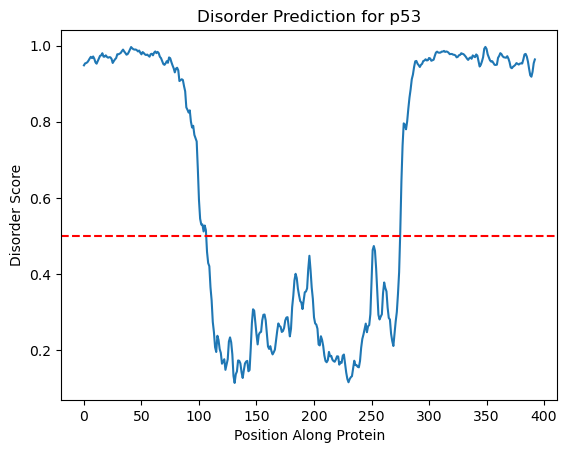

In [22]:
sequence = """MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGP
DEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAK
SVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHE
RCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNS
SCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELP
PGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPG
GSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD""".split('\n')

sequence = ''.join(sequence)
print(len(sequence))

# Predict disorder of a sequence
prediction = aiupred_lib.predict_disorder(sequence, embedding_model, regression_model, device)

# https://www.uniprot.org/uniprotkb/P04637/entry
ax = pd.DataFrame(prediction).plot(xlabel='Position Along Protein',ylabel='Disorder Score',title='Disorder Prediction for p53',legend=False)
ax.axhline(y=0.5, color='r', linestyle='--')


In [29]:
aa_composition['AIUPRED_score'] = aa_composition.Sequence.apply(lambda x: aiupred_lib.predict_disorder(x, embedding_model, regression_model, device))
#aa_composition.to_csv("aa_composition_with_disorder_scores.tsv", sep="\t", index=False)

In [3]:
aa_composition = pd.read_csv("aa_composition_with_disorder_scores.tsv",sep='\t') #= aa_composition.drop(columns=['disordered_aa_ix'])
aa_composition

,Protein_ID,Region,isolate,A,C,D,E,F,G,H,...,Length,Aromaticity,Isoelectric_point,Charge_at_pH6,Charge_at_pH7,Secondary_structure_fraction,RGG_count,GGR_count,Sequence,AIUPRED_score
0,ABL113W,1,Reference_genome,9,0,4,4,5,5,2,...,91,0.076923,10.337708,9.078102,7.645397,"(0.18681318681318682, 0.32967032967032966, 0.1...",0,0,SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...,[0.93939877 0.92995703 0.94546324 0.9510041 0...
1,ABL113W,1,C5ASGY,9,0,4,4,5,5,2,...,91,0.076923,10.337708,9.078102,7.645397,"(0.18681318681318682, 0.32967032967032966, 0.1...",0,0,SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...,[0.93939877 0.92995703 0.94546324 0.9510041 0...
2,ABL113W,1,F5ASGY,7,0,4,5,5,6,2,...,91,0.076923,10.080872,7.105613,5.649206,"(0.1758241758241758, 0.34065934065934067, 0.14...",0,0,SYEKKRKSFFFFGSSNSSSTRSSKGQAIQRSPVTAARTPTEKKVRP...,[0.8954561 0.89219713 0.912561 0.9219343 0...
3,ABL113W,1,F1ASGY,7,0,4,5,5,6,2,...,91,0.076923,10.080872,7.105613,5.649206,"(0.1758241758241758, 0.34065934065934067, 0.14...",0,0,SYEKKRKSFFFFGSSNSSSTRSSKGQAIQRSPVTAARTPTEKKVRP...,[0.8954561 0.89219713 0.912561 0.9219343 0...
4,ABL113W,1,G5ASGY,9,0,4,4,5,5,2,...,91,0.076923,10.337708,9.078102,7.645397,"(0.18681318681318682, 0.32967032967032966, 0.1...",0,0,SYEKKRKSFFFFGSSNSSSSRSSKAQTVQRSPVPAARAPTEKKVRP...,[0.93939877 0.92995703 0.94546324 0.9510041 0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45375,AAL181C,2,D6ASGY,42,0,43,43,5,30,7,...,586,0.013652,8.947571,12.040684,7.465217,"(0.1552901023890785, 0.3310580204778157, 0.197...",0,0,DINKPVSGRQSHPSGPEHAANSDSSVNLSNNPEYRVTPIVTPTLMS...,[0.9595535 0.9796847 0.9837797 0.9828937 0...
45376,AAL181C,2,G3ASGY,42,0,42,43,5,31,6,...,586,0.013652,9.019958,12.541099,8.376922,"(0.1552901023890785, 0.33447098976109213, 0.19...",0,0,DINKPVSGRQSHPSGPEHAANSDSSVNLSNNPEYRVTPIVTPTLMS...,[0.9596945 0.9797779 0.98383754 0.9829357 0...
45377,AAL181C,2,E2ASGY,45,0,44,38,7,26,7,...,581,0.017212,9.234558,16.914623,12.451287,"(0.14974182444061962, 0.3270223752151463, 0.19...",0,0,DINNPVSSRTVHPSISEHAVTAAASGTLSSNPEYRVAPIVTPTLMS...,[0.9226211 0.9391807 0.9435301 0.94095844 0...
45378,AAL181C,2,F6ASGY,44,0,45,42,5,29,5,...,586,0.015358,8.857117,10.058386,6.289301,"(0.14505119453924914, 0.32764505119453924, 0.1...",0,0,DISKPVSSRPAHPSGSEYDANSDPSLKLSENSEYRVTPIVTPTLMS...,[0.9542731 0.97342265 0.97610885 0.97426075 0...


In [ ]:
grouped_aa = aa_composition.groupby('Sequence').agg(set)
grouped_aa = grouped_aa.reset_index()
grouped_aa['AIUPRED_score'] = grouped_aa.Sequence.apply(lambda x: aiupred_lib.predict_disorder(x, embedding_model, regression_model, device))

grouped_aa['mean_disordered_score'] = grouped_aa['AIUPRED_score'].apply(np.mean)
grouped_aa['num_disordered'] = grouped_aa['AIUPRED_score'].apply(lambda x: len(np.argwhere(x >= 0.5))) # count number of disordered residues
grouped_aa['percent_disordered'] = grouped_aa['num_disordered'] / grouped_aa['Sequence'].str.len() # calculate percent disordered
grouped_aa['protein_length'] = grouped_aa['Sequence'].str.len() # calculate length of sequence
grouped_aa = grouped_aa.applymap(lambda x: list(x)[0] if isinstance(x, set) and len(x) == 1 else x)

grouped_aa['mean_disordered_score'] = grouped_aa['AIUPRED_score'].apply(np.mean)
grouped_aa['num_disordered'] = grouped_aa['AIUPRED_score'].apply(lambda x: len(np.argwhere(x >= 0.5))) # count number of disordered residues
grouped_aa['percent_disordered'] = grouped_aa['num_disordered'] / grouped_aa['Sequence'].str.len() # calculate percent disordered
grouped_aa['protein_length'] = grouped_aa['Sequence'].str.len() # calculate length of sequence
grouped_aa = grouped_aa.applymap(lambda x: list(x)[0] if isinstance(x, set) and len(x) == 1 else x)
# to csv grouped_aa.to_csv("grouped_aa_with_disorder_scores.tsv", sep="\t", index=False)


In [4]:
grouped_aa = pd.read_csv("Ashbya_grouped_results.AIUPRED.csv",index_col=0)
grouped_aa

,Sequence,Protein_ID,Region,isolate,A,C,D,E,F,G,...,Charge_at_pH6,Charge_at_pH7,Secondary_structure_fraction,RGG_count,GGR_count,AIUPRED_score,mean_disordered_score,num_disordered,percent_disordered,protein_length
0,AAAAKMPVSPVKRTDTSKQSPADVAAMMLSGLNDAESDEAPTLKLGD,AFR354C,1,"{'D6ASGY', 'G3ASGY'}",9,0,5,2,0,2,...,-1.880894,-2.193726,"(0.14893617021276595, 0.2553191489361702, 0.38...",0,0,[0.9625279 0.95556265 0.95093745 0.94848573 0...,0.939642,47,1.0,47
1,AAAAKMPVSTVKRTDNSKQSPADVAAMMLSGLNDAESDEAPTLKLGD,AFR354C,1,"{'E1ASGY', 'D5ASGY', 'F6ASGY', 'F5ASGY', 'H6AS...",9,0,5,2,0,2,...,-1.880894,-2.193726,"(0.14893617021276595, 0.2553191489361702, 0.38...",0,0,[0.95329404 0.94909793 0.94670093 0.94366646 0...,0.929511,47,1.0,47
2,AAAAKMPVSTVKRTDPSKQSPADVAAMMLSGLNDSESDDAPTLKLGD,AFR354C,1,"{'A3ASGY', 'G5ASGY', 'Reference_genome', 'A1AS...",8,0,6,1,0,2,...,-1.897210,-2.195415,"(0.14893617021276595, 0.276595744680851, 0.340...",0,0,[0.96721387 0.96091604 0.958531 0.9550076 0...,0.944735,47,1.0,47
3,AAAANTSSQDLAAEPVAAHQNAAARASDPPAPSQ,AAR185W,1,"{'E1ASGY', 'D5ASGY', 'F6ASGY', 'F5ASGY', 'H6AS...",13,0,2,1,0,0,...,-1.483433,-2.111909,"(0.058823529411764705, 0.2941176470588235, 0.4...",0,0,[0.96848667 0.9727502 0.9650498 0.9563659 0...,0.953766,34,1.0,34
4,AAAANTSSQDLAAESAAAHQNATARASDPPAPSQ,AAR185W,1,"{'D6ASGY', 'G3ASGY'}",13,0,2,1,0,0,...,-1.483433,-2.111909,"(0.029411764705882353, 0.29411764705882354, 0....",0,0,[0.97711223 0.97393376 0.9766246 0.9784328 0...,0.975078,34,1.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12093,YYTEDPAEAAAPASGAASAGATPAAAAPAATAAVAAPAPSAAAPAA...,AFL138W,1,"{'H6ASGY', 'F6ASGY'}",35,0,3,2,0,2,...,-3.450819,-4.146738,"(0.11267605633802817, 0.23943661971830985, 0.5...",0,0,[0.9688136 0.9758482 0.97497463 0.97251177 0...,0.968654,71,1.0,71
12094,YYTKDPAEVAAPAAAAAAAAPAAPAAAAPAAAAPAAAPAAAAPAAA...,AFL138W,1,"{'B3ASGY', 'C5ASGY', 'E2ASGY', 'A3ASGY'}",37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.12121212121212122, 0.16666666666666666, 0.6...",0,0,[0.96480125 0.96840245 0.9683301 0.9683715 0...,0.962185,66,1.0,66
12095,YYTKDPAEVAAPAAAAAAAAPATPAAAAPAAAAAPAAAPAAAAPAA...,AFL138W,1,A1ASGY,37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.11940298507462685, 0.16417910447761194, 0.6...",0,0,[0.970167 0.96865124 0.9657254 0.9651336 0...,0.964491,67,1.0,67
12096,YYTKDPAEVAAPAAAAAAAAPATPAAAAPAAAAASAAAPAAAAPAA...,AFL138W,1,Reference_genome,37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.11940298507462685, 0.16417910447761191, 0.6...",0,0,[0.96969813 0.96969 0.9661903 0.9647631 0...,0.961186,67,1.0,67


In [5]:
grouped_aa

,Sequence,Protein_ID,Region,isolate,A,C,D,E,F,G,...,Charge_at_pH6,Charge_at_pH7,Secondary_structure_fraction,RGG_count,GGR_count,AIUPRED_score,mean_disordered_score,num_disordered,percent_disordered,protein_length
0,AAAAKMPVSPVKRTDTSKQSPADVAAMMLSGLNDAESDEAPTLKLGD,AFR354C,1,"{'D6ASGY', 'G3ASGY'}",9,0,5,2,0,2,...,-1.880894,-2.193726,"(0.14893617021276595, 0.2553191489361702, 0.38...",0,0,[0.9625279 0.95556265 0.95093745 0.94848573 0...,0.939642,47,1.0,47
1,AAAAKMPVSTVKRTDNSKQSPADVAAMMLSGLNDAESDEAPTLKLGD,AFR354C,1,"{'E1ASGY', 'D5ASGY', 'F6ASGY', 'F5ASGY', 'H6AS...",9,0,5,2,0,2,...,-1.880894,-2.193726,"(0.14893617021276595, 0.2553191489361702, 0.38...",0,0,[0.95329404 0.94909793 0.94670093 0.94366646 0...,0.929511,47,1.0,47
2,AAAAKMPVSTVKRTDPSKQSPADVAAMMLSGLNDSESDDAPTLKLGD,AFR354C,1,"{'A3ASGY', 'G5ASGY', 'Reference_genome', 'A1AS...",8,0,6,1,0,2,...,-1.897210,-2.195415,"(0.14893617021276595, 0.276595744680851, 0.340...",0,0,[0.96721387 0.96091604 0.958531 0.9550076 0...,0.944735,47,1.0,47
3,AAAANTSSQDLAAEPVAAHQNAAARASDPPAPSQ,AAR185W,1,"{'E1ASGY', 'D5ASGY', 'F6ASGY', 'F5ASGY', 'H6AS...",13,0,2,1,0,0,...,-1.483433,-2.111909,"(0.058823529411764705, 0.2941176470588235, 0.4...",0,0,[0.96848667 0.9727502 0.9650498 0.9563659 0...,0.953766,34,1.0,34
4,AAAANTSSQDLAAESAAAHQNATARASDPPAPSQ,AAR185W,1,"{'D6ASGY', 'G3ASGY'}",13,0,2,1,0,0,...,-1.483433,-2.111909,"(0.029411764705882353, 0.29411764705882354, 0....",0,0,[0.97711223 0.97393376 0.9766246 0.9784328 0...,0.975078,34,1.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12093,YYTEDPAEAAAPASGAASAGATPAAAAPAATAAVAAPAPSAAAPAA...,AFL138W,1,"{'H6ASGY', 'F6ASGY'}",35,0,3,2,0,2,...,-3.450819,-4.146738,"(0.11267605633802817, 0.23943661971830985, 0.5...",0,0,[0.9688136 0.9758482 0.97497463 0.97251177 0...,0.968654,71,1.0,71
12094,YYTKDPAEVAAPAAAAAAAAPAAPAAAAPAAAAPAAAPAAAAPAAA...,AFL138W,1,"{'B3ASGY', 'C5ASGY', 'E2ASGY', 'A3ASGY'}",37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.12121212121212122, 0.16666666666666666, 0.6...",0,0,[0.96480125 0.96840245 0.9683301 0.9683715 0...,0.962185,66,1.0,66
12095,YYTKDPAEVAAPAAAAAAAAPATPAAAAPAAAAAPAAAPAAAAPAA...,AFL138W,1,A1ASGY,37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.11940298507462685, 0.16417910447761194, 0.6...",0,0,[0.970167 0.96865124 0.9657254 0.9651336 0...,0.964491,67,1.0,67
12096,YYTKDPAEVAAPAAAAAAAAPATPAAAAPAAAAASAAAPAAAAPAA...,AFL138W,1,Reference_genome,37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.11940298507462685, 0.16417910447761191, 0.6...",0,0,[0.96969813 0.96969 0.9661903 0.9647631 0...,0.961186,67,1.0,67


In [11]:
# Whi3 protein is ABL158C
grouped_aa[grouped_aa.Protein_ID == 'ABL158C']

,Sequence,Protein_ID,Region,isolate,A,C,D,E,F,G,...,Charge_at_pH6,Charge_at_pH7,Secondary_structure_fraction,RGG_count,GGR_count,AIUPRED_score,mean_disordered_score,num_disordered,percent_disordered,protein_length
7904,QIPFQTQMQMHQGSPPAPTHVTAYQQPLLSASGVVSPPQSASSVKR...,ABL158C,2,"{'H6ASGY', 'F6ASGY'}",18,1,9,8,9,24,...,11.105549,4.164461,"(0.1738095238095238, 0.33095238095238094, 0.15...",0,0,[0.9030809 0.93938965 0.9491977 0.9464033 0...,0.966234,420,1.0,420
7905,QIPFQTQMQMHQGSPPAPTHVTAYQQPLLSASGVVSPPQSASSVKR...,ABL158C,2,"{'E1ASGY', 'F5ASGY', 'D5ASGY', 'F1ASGY'}",18,1,9,7,9,24,...,12.078138,5.161651,"(0.17136150234741784, 0.323943661971831, 0.154...",0,0,[0.90361816 0.94034845 0.95017827 0.9473597 0...,0.967560,426,1.0,426
7906,QIPFQTQMQMHQGSPPAPTHVTAYQQPLLSASGVVSPPQSASSVKR...,ABL158C,2,"{'A3ASGY', 'G5ASGY', 'Reference_genome', 'A1AS...",18,1,9,7,9,24,...,13.055116,5.335999,"(0.17718446601941748, 0.33252427184466016, 0.1...",0,0,[0.90248716 0.93784696 0.94728965 0.9444419 0...,0.964447,412,1.0,412
7907,QIPFQTQMQMHQGSPPAPTHVTAYQQPLLSASGVVSPPQSASSVKR...,ABL158C,2,G3ASGY,18,1,9,7,9,24,...,11.589649,5.074477,"(0.17142857142857143, 0.3261904761904762, 0.15...",0,0,[0.9034807 0.9400897 0.9499087 0.9470919 0...,0.967280,420,1.0,420
7908,QIPFQTQMQMHQGSPPAPTHVTAYQQPLLSASGVVSPPQSASSVKR...,ABL158C,2,D6ASGY,18,1,9,7,9,24,...,11.589649,5.074477,"(0.17102137767220904, 0.3254156769596199, 0.15...",0,0,[0.9035618 0.94023114 0.9500526 0.9472324 0...,0.967499,421,1.0,421
9803,SLVNSHSSASVENAAYNLHRAFSSSTENVGHMTPSNSSPLHHSTVV...,ABL158C,1,"{'E1ASGY', 'F5ASGY', 'D5ASGY', 'F1ASGY'}",13,0,0,3,1,16,...,2.399855,-0.923211,"(0.1386861313868613, 0.5401459854014599, 0.211...",0,0,[0.93517566 0.9152794 0.920659 0.9305428 0...,0.968406,137,1.0,137
9804,SLVNSHSSASVENAAYNLHRAFSSSTENVGHMTPSNSSPLHHSTVV...,ABL158C,1,"{'A3ASGY', 'G5ASGY', 'Reference_genome', 'A1AS...",13,0,0,3,1,16,...,2.399855,-0.923211,"(0.1386861313868613, 0.5401459854014599, 0.211...",0,0,[0.9284882 0.89566946 0.9010176 0.91562665 0...,0.966881,137,1.0,137
9805,SLVNSHSSASVENAAYNLHRAFSSSTENVGHMTPSNSSPLHHSTVV...,ABL158C,1,"{'H6ASGY', 'F6ASGY'}",13,0,0,3,1,16,...,2.399855,-0.923211,"(0.1386861313868613, 0.5401459854014599, 0.211...",0,0,[0.9230746 0.8909997 0.8968946 0.9119003 0...,0.965072,137,1.0,137
9806,SLVNSHSSASVENAAYNLHRALSSSTENVGHMTPSNSSPLHHSTVV...,ABL158C,1,"{'D6ASGY', 'G3ASGY'}",13,0,0,3,0,16,...,2.399855,-0.923211,"(0.13970588235294118, 0.5367647058823529, 0.22...",0,0,[0.95046127 0.91789556 0.92454684 0.9397396 0...,0.973151,136,1.0,136
11066,TSGTHNNKGGIRLSFSKNPLGVRGPNSRRGGATNNTSNAGTTNYSY...,ABL158C,3,"{'A3ASGY', 'G5ASGY', 'Reference_genome', 'A1AS...",5,0,0,0,2,9,...,7.360062,6.480336,"(0.1509433962264151, 0.49056603773584906, 0.13...",1,0,[0.92073894 0.9439437 0.931272 0.92156214 0...,0.892412,53,1.0,53


In [78]:
whi3 = "QIPFQTQMQMHQGSPPAPTHVTAYQQPLLSASGVVSPPQSASSVKRPSLLVQRSRFSFTDPFSSEQTNMGSQQPDLITTPLKGHQDTGKSFLLMESDEINDSIWGNGTGIPSSISGLTTSQPPTPHLEWGTTGRRQSSTFYPSQSNTEIPPMHLTGQVQSSQLATGLQQPLPQPQRQSLSYNLVTPLSSDMNLPPQSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQHQQQQHHLQQQQLQQQPQSLSQQPQQQQSQQSQAHSQQQQQQQQQQQQEQQQQQQPQQQQPQQPPQQHQPQQPQQQNSQQALVGQSQQQVTSGQQKGSSRNSISKTLQVNGPKNAAAALQNTNGISQVDLSLLAKVPPPANPADQNPPCNTLYVGNLPPDATEQELRQLFSSQKGFRRLSFRNKNNNGNG"

# sequence = ''.join("""MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKFICTTGKLPVPWPTL
# VTTFSYGVQCFSRYPDHMKQHDFFKSAMPEGYVQERTIFFKDDGNYKTRAEVKFEGDTLV
# NRIELKGIDFKEDGNILGHKLEYNYNSHNVYIMADKQKNGIKVNFKIRHNIEDGSVQLAD
# HYQQNTPIGDGPVLLPDNHYLSTQSALSKDPNEKRDHMVLLEFVTAAGITHGMDELYK""".split('\n'))

sequence = whi3

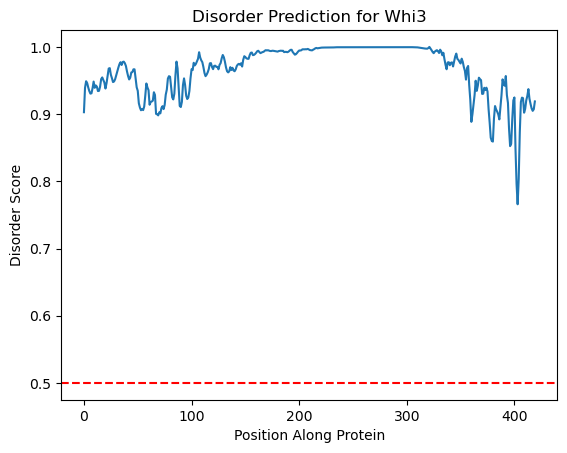

In [77]:
# Predict disorder of a sequence

prediction = aiupred_lib.predict_disorder(sequence, embedding_model, regression_model, device)

# https://www.uniprot.org/uniprotkb/P04637/entry
ax = pd.DataFrame(prediction).plot(xlabel='Position Along Protein',ylabel='Disorder Score',title='Disorder Prediction for Whi3',legend=False)
ax.axhline(y=0.5, color='r', linestyle='--')


In [175]:
candidate_disordered = grouped_aa[grouped_aa['percent_disordered'] != 1][grouped_aa['percent_disordered'] != 0]
candidate_disordered['RGG_motif_count'] = candidate_disordered['RGG_count'] + candidate_disordered['GGR_count']
has_motif = candidate_disordered[candidate_disordered['RGG_motif_count'] > 0]
protein_present_multiple_times = has_motif[has_motif['Protein_ID'].isin(has_motif['Protein_ID'].value_counts()[has_motif['Protein_ID'].value_counts() > 1 ].index)]
length_filt = protein_present_multiple_times[protein_present_multiple_times['protein_length'] > 100 ]
protein_agg = length_filt.groupby('Protein_ID').agg(list)
protein_agg['num_disordered_std'] = protein_agg['num_disordered'].apply(np.std)
protein_agg.sort_values(by='num_disordered_std',ascending=False)#.to_csv("AIUPRED_candidates_Protein_ID_aggregated.tsv",sep='\t')


/var/folders/pm/gdtrt3dn5l19fhm45t9qtmdh0000gn/T/ipykernel_37117/477562292.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  grouped_aa = grouped_aa.applymap(lambda x: list(x)[0] if isinstance(x, set) and len(x) == 1 else x)


In [245]:
f = open("ashbya_Sc_orthologs","r")
mapping = f.read()
f.close()
mapping= mapping.splitlines()
mapping_dict = {}
for i in mapping:
    prot_id = i.split(' ')[1].split('_')[-1]
    desc = ' '.join(i.split(' ')[2:])
    mapping_dict[prot_id] = desc

In [250]:
for p in protein_agg.sort_values(by='num_disordered_std',ascending=False).index:
    if p in mapping_dict:
        print(p, ':', mapping_dict[p]) # print protein ID and description
    else:
        print(p, ': No Saccharomyces cerevisiae homolog found')

ADR353C : Syntenic homolog of Saccharomyces cerevisiae YOR324C (FRT1) and YAL028W (FRT2)
AEL262C : Syntenic homolog of Saccharomyces cerevisiae YPR171W (BSP1)
AER364W : Syntenic homolog of Saccharomyces cerevisiae YNL071W (LAT1)
AAR011C : Syntenic homolog of Saccharomyces cerevisiae YOL036W and YIR016W
AFL159W : Syntenic homolog of Saccharomyces cerevisiae YMR190C (SGS1)
ACR209W : No Saccharomyces cerevisiae homolog found
ADL172W : Syntenic homolog of Saccharomyces cerevisiae YNL309W (STB1)
AGL056W : Syntenic homolog of Saccharomyces cerevisiae YPR005C (HAL1)
AGR275C : Syntenic homolog of Saccharomyces cerevisiae YOR178C (GAC1) and YLR273C (PIG1)
ADL020W : Syntenic homolog of Saccharomyces cerevisiae YOR008C (SLG1)
ADR394W : Syntenic homolog of Saccharomyces cerevisiae YOR359W (VTS1)
AEL149C : Syntenic homolog of Saccharomyces cerevisiae YJL187C (SWE1)
ADR232W : Syntenic homolog of Saccharomyces cerevisiae YKR090W (PXL1)
ABL063C : Syntenic homolog of Saccharomyces cerevisiae YBR078W (E

In [82]:
grouped_prot = grouped_aa.groupby('Protein_ID').agg(set)
for ix,i in grouped_prot.loc['AAL010W'].items():
    print(ix,i)

Sequence {'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGAGSGPGAETGPALHQQLGPQQQPPMVGRAEPPTSASGAGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQQLHQPPSQHPHQHQNQHLHQHQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI', 'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGAGSGPGAETGPALHQQLGPQQQPPMVGRAEPPTSAGGAGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQQLHQPPSQHPHQHQNQHLHQHQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI', 'EMPTVAATPVSSCMSTPINMISTNTASINLDNTSFSNSTIESAPSSAAGMVNSGVSSVDAVSNISKPALHN', 'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGVEAGPALHQQLVPQQQPPMAGRAEPPSSGGGLGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQLLHQPPSQHPHQHQTQHLHLHQHQNLHQHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI', 'EMPTVAATPVSSCMSTPINMIST

In [84]:
seqs = {'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGAGSGPGAETGPALHQQLGPQQQPPMVGRAEPPTSASGAGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQQLHQPPSQHPHQHQNQHLHQHQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI', 'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGAGSGPGAETGPALHQQLGPQQQPPMVGRAEPPTSAGGAGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQQLHQPPSQHPHQHQNQHLHQHQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI', 'EMPTVAATPVSSCMSTPINMISTNTASINLDNTSFSNSTIESAPSSAAGMVNSGVSSVDAVSNISKPALHN', 'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGVEAGPALHQQLVPQQQPPMAGRAEPPSSGGGLGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQLLHQPPSQHPHQHQTQHLHLHQHQNLHQHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI', 'EMPTVAATPVSSCMSTPINMISTNAASINLDNTSFNNSTIESAPSSAAGMVNSGVSSVDAVTNINKTTLHN', 'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGVEAGPALHQQLVPQQQPPMAGRAEPPSSGGGPGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQLLHQPPSQHPHQHQTQHLHQHQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI', 'EMPTVAATPVSSCMSTPINMISTNAASINLDNTSFNNSTIESAPSSAAGMVNSGVSSVDAVANINKTTLHN', 'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGAETGPALHQQLGPQQQPPMVGRAEPLTSAGGAGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQLLHQPPSQHPHQHQNQHLHQHQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGELAPQPVISPELTSKRTTQENI', 'NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNSHGPGAGSGPGAEGPALHQQLVPQQQPLMAGRGEPPISAGGAGSGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYATGYGPSHLPPISSKGGAAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQLLHQAPSQHPHQHQNQHLHQNQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVIASELTSKRTTQENI'}
for s in set(seqs):
    print(len(s),s)


295 NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGAGSGPGAETGPALHQQLGPQQQPPMVGRAEPPTSASGAGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQQLHQPPSQHPHQHQNQHLHQHQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI
295 NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGAGSGPGAETGPALHQQLGPQQQPPMVGRAEPPTSAGGAGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQQLHQPPSQHPHQHQNQHLHQHQHQNQHLHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI
71 EMPTVAATPVSSCMSTPINMISTNTASINLDNTSFSNSTIESAPSSAAGMVNSGVSSVDAVSNISKPALHN
289 NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGVEAGPALHQQLVPQQQPPMAGRAEPPSSGGGLGAGQAQGLLAQPLAQQMYGAAPHGALMAHPPHLQYAAGYGPSHLPPISSKGGPAMKHQAEDFGALHSPPRQYAAQLQRPPSTAGQIPLVLAPQQRHGTPPAQVQQLLHQPPSQHPHQHQTQHLHLHQHQNLHQHQSQQNPQHVQVQLKHFQHMQDLHRQQQHHQLLLQEQEQRWKKRKAGEPAPQPVISSELTSKRTTQENI
71 EMPTVAATPVSSCMSTPINMISTNAASI

In [91]:
grouped_aa[grouped_aa.Protein_ID == 'AAL010W']

,Sequence,Protein_ID,Region,isolate,A,C,D,E,F,G,...,Charge_at_pH6,Charge_at_pH7,Secondary_structure_fraction,RGG_count,GGR_count,AIUPRED_score,mean_disordered_score,num_disordered,percent_disordered,protein_length
2454,EMPTVAATPVSSCMSTPINMISTNAASINLDNTSFNNSTIESAPSS...,AAL010W,2,D6ASGY,9,1,2,2,1,2,...,-2.451623,-3.081846,"(0.1971830985915493, 0.4084507042253521, 0.239...",0,0,[0.29119715 0.28551224 0.27115378 0.25456682 0...,0.155506,0,0.0,71
2455,EMPTVAATPVSSCMSTPINMISTNAASINLDNTSFNNSTIESAPSS...,AAL010W,2,"{'E1ASGY', 'D5ASGY', 'F6ASGY', 'G3ASGY', 'F5AS...",8,1,2,2,1,2,...,-2.451623,-3.081846,"(0.1971830985915493, 0.4084507042253521, 0.225...",0,0,[0.29358184 0.2911202 0.275939 0.2576718 0...,0.165845,0,0.0,71
2456,EMPTVAATPVSSCMSTPINMISTNTASINLDNTSFSNSTIESAPSS...,AAL010W,2,"{'A3ASGY', 'G5ASGY', 'Reference_genome', 'A1AS...",8,1,2,2,1,2,...,-2.451623,-3.081846,"(0.1971830985915493, 0.43661971830985913, 0.22...",0,0,[0.2924385 0.30564964 0.2895838 0.2637107 0...,0.181861,0,0.0,71
7132,NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNSH...,AAL010W,1,"{'A3ASGY', 'G5ASGY', 'Reference_genome', 'A1AS...",32,0,3,9,2,24,...,15.975500,5.869860,"(0.16319444444444445, 0.30902777777777773, 0.2...",0,0,[0.97333163 0.979094 0.9772402 0.9749586 0...,0.988758,288,1.0,288
7133,NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSH...,AAL010W,1,"{'E1ASGY', 'F5ASGY', 'D5ASGY', 'F1ASGY'}",31,0,3,9,2,24,...,16.463990,5.957034,"(0.16262975778546712, 0.3044982698961938, 0.25...",0,0,[0.97338355 0.9793719 0.977706 0.9755428 0...,0.989561,289,1.0,289
7134,NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSH...,AAL010W,1,F6ASGY,32,0,3,9,2,27,...,16.463990,5.957034,"(0.14915254237288134, 0.3220338983050847, 0.24...",0,0,[0.97255576 0.97927624 0.9777393 0.97569174 0...,0.992088,295,1.0,295
7135,NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSH...,AAL010W,1,H6ASGY,32,0,3,9,2,26,...,16.463990,5.957034,"(0.14915254237288134, 0.3220338983050847, 0.24...",0,0,[0.9726585 0.9793519 0.9778195 0.9757717 0...,0.991933,295,1.0,295
7136,NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSH...,AAL010W,1,G3ASGY,30,0,3,9,2,24,...,16.463990,5.957034,"(0.16608996539792387, 0.31141868512110726, 0.2...",0,0,[0.97332287 0.9791598 0.9775895 0.9754111 0...,0.990332,289,1.0,289
7137,NVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSH...,AAL010W,1,D6ASGY,30,0,3,9,2,24,...,16.463990,5.957034,"(0.15916955017301038, 0.314878892733564, 0.242...",0,0,[0.97281915 0.97895634 0.977347 0.9751087 0...,0.991098,289,1.0,289


In [89]:
! cat homolog_multiple_sequence_alignments/AAL010W.aln

CLUSTAL O(1.2.3) multiple sequence alignment


Reference_genome      MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNSHGPGAGSGPGA---
C5ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNSHGPGAGSGPGA---
F5ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGS------G
F1ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGS------G
G5ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNSHGPGAGSGPGA---
A5ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNSHGPGAGSGPGA---
E1ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGS------G
D5ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGS------G
H6ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNSHGPGAGSGPGAGSG
A1ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNSHGPGAGSGPGA---
B3ASGY                MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNSHGPGAGSGPGA---
D6ASGY                MNVDQASQEPWASASLLN

<Axes: title={'center': 'Isoforms per Protein'}, xlabel='Number of Isoforms', ylabel='Frequency'>

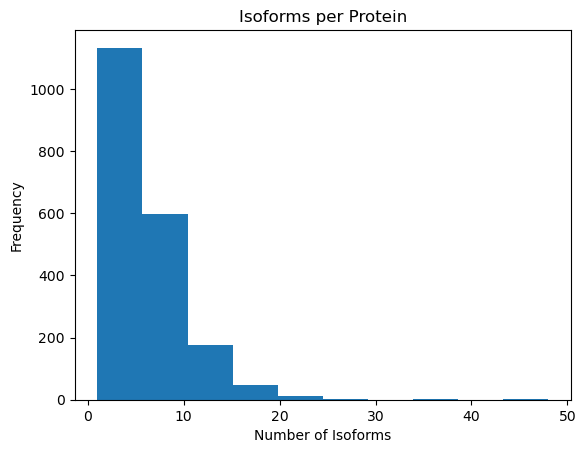

In [ ]:
# Assessing variation 
protein_agg = grouped_aa.groupby('Protein_ID').agg({'Sequence':set,'Region':set , 'isolate':set})#.sort_values('Region',ascending=False)
protein_agg['num_variants'] = protein_agg['Sequence'].apply(len)
protein_agg['num_regions'] = protein_agg['Region'].apply(len)

protein_agg.num_variants.plot(kind='hist',title='Isoforms per Protein',xlabel='Number of Isoforms',ylabel='Frequency')

# Which proteins have region variability?  (i.e. different regions for the same protein)
# Which proteins have sequence variability? (i.e. different sequences for the same protein)

<Axes: title={'center': 'Region-Specificity of Proteins'}, xlabel='Number of Regions', ylabel='Frequency'>

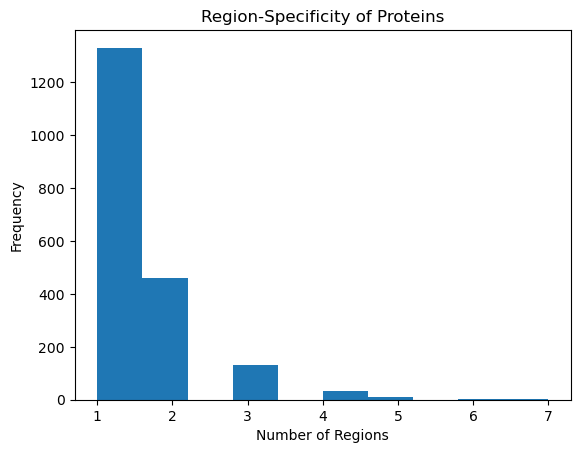

In [38]:
protein_agg.num_regions.plot(kind='hist',title='Region-Specificity of Proteins',xlabel='Number of Regions',ylabel='Frequency')

In [ ]:
# Assessing variation 
protein_agg = grouped_aa.groupby('Protein_ID').agg({'Sequence':set,'Region':set , 'isolate':set})#.sort_values('Region',ascending=False)
protein_agg['num_variants'] = protein_agg['Sequence'].apply(len)
protein_agg['num_regions'] = protein_agg['Region'].apply(len)

,Sequence,Protein_ID,Region,isolate,A,C,D,E,F,G,...,Charge_at_pH6,Charge_at_pH7,Secondary_structure_fraction,RGG_count,GGR_count,AIUPRED_score,mean_disordered_score,num_disordered,percent_disordered,protein_length
0,AAAAKMPVSPVKRTDTSKQSPADVAAMMLSGLNDAESDEAPTLKLGD,AFR354C,1,"{'D6ASGY', 'G3ASGY'}",9,0,5,2,0,2,...,-1.880894,-2.193726,"(0.14893617021276595, 0.2553191489361702, 0.38...",0,0,[0.9625279 0.95556265 0.95093745 0.94848573 0...,0.939642,47,1.0,47
1,AAAAKMPVSTVKRTDNSKQSPADVAAMMLSGLNDAESDEAPTLKLGD,AFR354C,1,"{'E1ASGY', 'D5ASGY', 'F6ASGY', 'F5ASGY', 'H6AS...",9,0,5,2,0,2,...,-1.880894,-2.193726,"(0.14893617021276595, 0.2553191489361702, 0.38...",0,0,[0.95329404 0.94909793 0.94670093 0.94366646 0...,0.929511,47,1.0,47
2,AAAAKMPVSTVKRTDPSKQSPADVAAMMLSGLNDSESDDAPTLKLGD,AFR354C,1,"{'A3ASGY', 'G5ASGY', 'Reference_genome', 'A1AS...",8,0,6,1,0,2,...,-1.897210,-2.195415,"(0.14893617021276595, 0.276595744680851, 0.340...",0,0,[0.96721387 0.96091604 0.958531 0.9550076 0...,0.944735,47,1.0,47
3,AAAANTSSQDLAAEPVAAHQNAAARASDPPAPSQ,AAR185W,1,"{'E1ASGY', 'D5ASGY', 'F6ASGY', 'F5ASGY', 'H6AS...",13,0,2,1,0,0,...,-1.483433,-2.111909,"(0.058823529411764705, 0.2941176470588235, 0.4...",0,0,[0.96848667 0.9727502 0.9650498 0.9563659 0...,0.953766,34,1.0,34
4,AAAANTSSQDLAAESAAAHQNATARASDPPAPSQ,AAR185W,1,"{'D6ASGY', 'G3ASGY'}",13,0,2,1,0,0,...,-1.483433,-2.111909,"(0.029411764705882353, 0.29411764705882354, 0....",0,0,[0.97711223 0.97393376 0.9766246 0.9784328 0...,0.975078,34,1.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12093,YYTEDPAEAAAPASGAASAGATPAAAAPAATAAVAAPAPSAAAPAA...,AFL138W,1,"{'H6ASGY', 'F6ASGY'}",35,0,3,2,0,2,...,-3.450819,-4.146738,"(0.11267605633802817, 0.23943661971830985, 0.5...",0,0,[0.9688136 0.9758482 0.97497463 0.97251177 0...,0.968654,71,1.0,71
12094,YYTKDPAEVAAPAAAAAAAAPAAPAAAAPAAAAPAAAPAAAAPAAA...,AFL138W,1,"{'B3ASGY', 'C5ASGY', 'E2ASGY', 'A3ASGY'}",37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.12121212121212122, 0.16666666666666666, 0.6...",0,0,[0.96480125 0.96840245 0.9683301 0.9683715 0...,0.962185,66,1.0,66
12095,YYTKDPAEVAAPAAAAAAAAPATPAAAAPAAAAAPAAAPAAAAPAA...,AFL138W,1,A1ASGY,37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.11940298507462685, 0.16417910447761194, 0.6...",0,0,[0.970167 0.96865124 0.9657254 0.9651336 0...,0.964491,67,1.0,67
12096,YYTKDPAEVAAPAAAAAAAAPATPAAAAPAAAAASAAAPAAAAPAA...,AFL138W,1,Reference_genome,37,0,2,2,0,0,...,-1.462015,-2.148858,"(0.11940298507462685, 0.16417910447761191, 0.6...",0,0,[0.96969813 0.96969 0.9661903 0.9647631 0...,0.961186,67,1.0,67


In [71]:
feature_variation = pd.concat([grouped_aa.iloc[:,1], grouped_aa.iloc[:,4:29]],axis=1).groupby('Protein_ID').agg(np.std)
feature_variation


/var/folders/pm/gdtrt3dn5l19fhm45t9qtmdh0000gn/T/ipykernel_1461/494630826.py:1: FutureWarning: The provided callable <function std at 0x1043d9f80> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  feature_variation = pd.concat([grouped_aa.iloc[:,1], grouped_aa.iloc[:,4:29]],axis=1).groupby('Protein_ID').agg(np.std)


,A,C,D,E,F,G,H,I,K,L,...,S,T,V,W,Y,Length,Aromaticity,Isoelectric_point,Charge_at_pH6,Charge_at_pH7
Protein_ID,,,,,,,,,,,,,,,,,,,,,
AAL006C,0.975900,0.00000,0.377964,0.487950,0.000000,1.603567,0.487950,1.889822,0.000000,1.000000,...,2.149197,0.690066,1.272418,0.000000,0.534522,2.138090,0.004254,0.328687,1.534536,1.473336
AAL007C,0.547723,0.00000,0.547723,0.836660,0.000000,0.000000,0.000000,0.000000,0.894427,0.000000,...,1.095445,0.447214,0.000000,0.000000,0.000000,2.387467,0.000451,0.050173,0.895110,0.893710
AAL010W,11.446737,0.50000,0.500000,3.500000,0.500000,11.464922,11.921036,0.527046,3.000000,12.298374,...,4.567397,3.270236,0.781736,1.000000,2.000000,109.946704,0.006717,2.631032,9.418418,4.512263
AAL011C,1.154701,0.00000,0.000000,0.577350,0.000000,0.000000,0.577350,0.000000,0.577350,0.000000,...,0.577350,1.154701,0.577350,0.000000,0.000000,0.000000,0.000000,0.054799,0.284631,0.508943
AAL013W,1.341641,0.83666,0.547723,0.836660,0.447214,1.341641,0.547723,0.000000,0.447214,0.447214,...,1.949359,0.547723,0.547723,0.000000,0.000000,0.000000,0.005590,0.583715,0.752798,0.714603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGR391W,0.447214,0.00000,0.447214,0.836660,0.000000,1.224745,0.547723,0.000000,0.000000,0.547723,...,1.341641,0.447214,1.000000,0.447214,0.000000,0.547723,0.006345,0.572781,0.865127,1.149029
AGR392C,1.527525,0.00000,1.000000,1.000000,0.000000,0.577350,0.000000,0.000000,0.577350,1.154701,...,1.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.156846,0.577523,0.576776
AGR395W,0.707107,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Opening and parsing the homolog_multiple_sequence_alignment files 
# Generate the similar features file
# Is there any variation in sequence between regions? 
# Is there any variation in composition? 
# Looking specifically at the positive controls, can we effectively call the tracts as disordered or not? 
# What is the distribution of the AIUPRED scores for the positive controls?

ashbya_genes = ! ls homolog_multiple_sequence_alignments/*txt 

ashbya_genes[0]  

'\x1bhomolog_multiple_sequence_alignments/AAL001W.txt\x1b[m\x1b[m'

# 11.10.24 Feature Generation (Attempt 2)

- Week 1 :
- Week 2 : 
- Week 3 : 
- Week 4 : 
- Week 5 : [HERE]
- Week 6 : 
- Week 7 : 
- Week 8 : 

In [162]:
from Bio.Seq import Seq 
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
import pandas as pd 

fasta_list = ! ls --color=none homolog_multiple_sequence_alignments/*txt | grep -v 'CDS'
ret_dict = {}
for fasta_path in fasta_list: 
    name = fasta_path.split('/')[-1].split('.')[0]
    fasta_dict = SeqIO.to_dict(SeqIO.parse(fasta_path, 'fasta'))
    ret_dict[name] = {s:str(fasta_dict[s].seq) for s in fasta_dict} 
all_ashbya_sequences = pd.DataFrame(ret_dict)
all_ashbya_sequences


,AAL001W,AAL002W,AAL003W,AAL004W,AAL005W,AAL006C,AAL007C,AAL008W,AAL009C,AAL010W,...,AGR397C,AGR398W,AGR399C,AGR400W,AGR401W,AGR402C,AGR403W,AGR405C,AGR406C,AGR407C
Reference_genome,MKLISQSKGTSSSEVCLVVVAQDKEDLFTLYNIINTDDELIFKKKL...,MNFEEEEVTTSNKATFYFNKYKTLYQYYLDQTTPHVRYRWAGLIVL...,MRTYIRYSRPLKAVQRTMSTNRTPMNGLEGIFDAVKGSLSSLRTIF...,MGKLDCQRNWYQQLIRRAMSNDGTTPLSHVSALTDSVGWAIHERFK...,MSFYTVVATFLSVVLASAVFWVLAPKENQTVWRSTIILSMSMMFLM...,MQNSTTAVDVPQPVLDWLFKVLQPEYYDPRTTFHDVVIALRAYKKL...,MSEEHMIKPENVAPSADTSEWPLLLKNYDKLLVRSGHYTPIPAGAS...,MVKETKLYDLLGVSPSASDAELKKGYRKAALKYHPDKPTGDTEKFK...,MSVILASAGYDHTIRFWEALTGVCSRTIQHADSQVNRLEITSDKRY...,MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNS...,...,MPVEKRVFVGNLRKNTSECIEQLYDRFAQFGRCIEPHFECHPTFAY...,MGSVEYSKARFPTSLDIPLRDSEEVVSIDLENDLPDDPADLKTLLV...,MGYYDLDDILADSSKFACRFNYELPGLGYLEGNPGKPVGKHSKVEL...,MVCDSVIYHPTLTRLVRYLDSTAGREKTLRLLQYLCRFLGFQYKSV...,MNTNASLGIPVNSRAGSGGMQAGQRAASSIGGAAAGGAGATAQQST...,MTTARDNSATTLELYRKTLNFNVIGRYDPKIKQLLFHTPHATVYKW...,MSSALNIGVVGTGIFAKDTHLPVLASFQDQFRVLAAHNRTKAKAEA...,MTKDLLGYWESLVPPQPPPVWNYTATEVIDLAYGLAQKSDAVYESV...,MKDLASLVPPQAAPSWNFSAQDVISLSHQLINQTEAVYHNVLQEKP...,MKVQTGLTIAVLASTACALPADGVFRVPVHKKTVNFSEGGTIQAHI...
C5ASGY,MKLISQSKGTSSSEVCLVVVAQDKEDLFTLYNIINTDDELIFKKKL...,MNFEEEEVTTSNKATFYFNKYKTLYQYYLDQTTPHVRYRWAGLIVL...,MRTYIRYSRPLKAVQRTMSTNRTPMNGLEGIFDAVKGSLSSLRTIF...,MGKLDCQRNWYQQLIRRAMSNDGTTPLSHVSALTDSVGWAIHERFK...,MSFYTVVATFLSVVLASAVFWVLAPKENQTVWRSTIILSMSMMFLM...,MQNSTTAVDVPQPVLDWLFKVLQPEYYDPRTTFHDVVIALRAYKKL...,MSEEHMIKPENVAPSADTSEWPLLLKNYDKLLVRSGHYTPIPAGAS...,MVKETKLYDLLGVSPSASDAELKKGYRKAALKYHPDKPTGDTEKFK...,MSVILASAGYDHTIRFWEALTGVCSRTIQHADSQVNRLEITSDKRY...,MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPSAPTTSNS...,...,MPVEKRVFVGNLRKNTSECIEQLYDRFAQFGRCIEPHFECHPTFAY...,MGSVEYSKARFPTSLDIPLRDSEEVVSIDLENDLPDDPADLKTLLV...,MGYYDLDDILADSSKFACRFNYELPGLGYLEGNPGKPVGKHSKVEL...,MVCDSVIYHPTLTRLVRYLDSTAGREKTLRLLQYLCRFLGFQYKSV...,MNTNASLGIPVNSRAGSGGMQAGQRAASSIGGAAAGGAGATAQQST...,MTTARDNSATTLELYRKTLNFNVIGRYDPKIKQLLFHTPHATVYKW...,MSSALNIGVVGTGIFAKDTHLPVLASLQDQFRVLAAHNRTKAKAEA...,MTKDLLGYWESLVPPQPPPVWNYTATEVIDLAYGLAQKSDAVYESV...,MKDLASLVPPQAAPSWNFSAQDVISLSHQLINQTEAVYHNVLQEKP...,MKVQTGLTIAVLASTACALPADGVFRVPVHKKTVNFSEGGTIQAHI...
F5ASGY,MKLISQTKGASSSEVCLVVVAQDKEDLFTLYNIINTDDELIFKKKL...,MNFGEEETTTSNNKATFYFNKYKTLYQYYLDQTTPHVRYRWSSLIV...,MRTYTKYNRSLKVLQRTLSTNLTAMHGLDRFVDAVKGSLSSLQTMF...,MGKLESRRNWYQQLIRRAMSNDATSPLSHVSAITGSVGWTIHERFK...,MSFYTVVATFLSVALASAVFWVLAPKENQTVWRSTIILSMSMMFLM...,MESATASVDVPQPVLDWLFKVLQHDYYDPRTTFHDVVIALATYKKL...,MSEEHMIKPENVAPSADTSEWPLLLKNYDKLLVRSGHYTPIPAGAS...,MVKETKLYDLLGVSPSASDAELKKGYRKAALKYHPDKPTGDTEKFK...,MSVILASAGYDHTIRFWEALTGVCSRTIQHADSQVNRLEITSDKRY...,MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNS...,...,MPVEKRVFVGNLQKNTTECIKQLYERFGQFGRCLEPQFECHSSFAY...,MGSVEYSKARFPTSLDIPLRDSEEVVSIDLENDLPDDPADLKTLLV...,MGYYDLDDILADSTKFACRFNYELPGLGYLEGNPGKPVGKHSKVEL...,MVCDSVIYHPTLTRLVRYLDSTAGREKTLRLLQYLCRFLGFQYKSV...,MNTNAGLGIPVNSRAGSSGMQAGQRAGSTIGGGATGAASATAQQST...,MTTARDNSATTLELYRKTLNFNVIGRYDPKIKQLLFHTPHATVYKW...,MSSALNVGVVGTGIFAKDNHLPVLASLPDRFRVFAAHNRTRSKAEE...,MGKGLLGHWGLVPPQPTLVPPQPAPFWNYTATEVIDLAYDLVEKSD...,MKNLSALVPPQAAPSWNFTAQEVVGLTYQLINQTETLYSKVLQENP...,MKVQAGLTLAVLASTACALPSGGVLRVPVHKKEVNFGEGGTIQAHI...
F1ASGY,MKLISQTKGASSSEVCLVVVAQDKEDLFTLYNIINTDDELIFKKKL...,MNFGEEETTTSNNKATFYFNKYKTLYQYYLDQTTPHVRYRWSSLIV...,MRTYTKYNRSLKVLQRTLSTNLTAMHGLDRFVDAVKGSLSSLQTMF...,MGKLESRRNWYQQLIRRAMSNDATSPLSHVSAITGSVGWTIHERFK...,MSFYTVVATFLSVALASAVFWVLAPKENQTVWRSTIILSMSMMFLM...,MESATASVDVPQPVLDWLFKVLQHDYYDPRTTFHDVVIALATYKKL...,MSEEHMIKPENVAPSADTSEWPLLLKNYDKLLVRSGHYTPIPAGAS...,MVKETKLYDLLGVSPSASDAELKKGYRKAALKYHPDKPTGDTEKFK...,MSVILASAGYDHTIRFWEALTGVCSRTIQHADSQVNRLEITSDKRY...,MNVDQASQEPWASASLLNRSTPSTSTGTPLNTAQSSLPTAPTTSNS...,...,MPVEKRVFVGNLQKNTTECIKQLYERFGQFGRCLEPQFECHSSFAY...,MGSVEYSKARFPTSLDIPLRDSEEVVSIDLENDLPDDPADLKTLLV...,MGYYDLDDILADSTKFACRFNYELPGLGYLEGNPGKPVGKHSKVEL...,MVCDSVIYHPTLTRLVRYLDSTAGREKTLRLLQYLCRFLGFQYKSV...,MNTNAGLGIPVNSRAGSSGMQAGQRAGSTIGGGATGAASATAQQST...,MTTARDNSATTLELYRKTLNFNVIGRYDPKI

In [ ]:
sequence = all_ashbya_sequences['ABL158C']['Reference_genome']
sequence

'MSLVNSHSSASVENAAYNLHRAFSSSTENVGHMTPSNSSPLHHSTVVAMGAESQGGGASNNNNNPANPGSTANNNSNNVNMNSIGGGASLGAGSGATGSISGTKGMNNSHSPLHIATMLNTLSMNSNPPSQQQSNVQGPYLVRLQNVPKDTTLRECHALFALAHGVLSIELSSFQQYAERSQTSGQESTNYIVAKFDSLHLACQYATILDEKAQIFGPSFPFKTYVEVVDELTQQQIPFQTQMQMHQGSPPAPTHVTAYQQPLLSASGVVSPPQSASSVKRPSLLVQRSRFSFTDPFSSEQTNMGSQQPDLITTPLKGHQDTGKSFLLMESDEINDSIWGNGTGIPSSISGLTTSQPPTPHLEWGTTGRRQSSTFYPSQSNTEIPPMHLTGQVQSSQLATGLQQPLPQPQRQSLSYNLVTPLSSDMNLPPQSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQLQQQQHHLQQQQHQQQQQSLSQQPQQQQSQQSQAHSQQHQQQHQQQQQQQQPQQQQPQQHPPQQPQQQNSQQAIVGQSQQQVTSGQQKGSSRNSISKTLQVNGPKNAAAALQNTNGISQVDLSLLAKVPPPANPADQNPPCNTLYVGNLPPDATEQELRQLFSSQKGFRRLSFRNKNNNGNGHGPMCFVEFEDVAHATRALAELYGSQLARTSGTHNNKGGIRLSFSKNPLGVRGPNSRRGGATNNTSNAGTTNYSYAAAFGKS*'

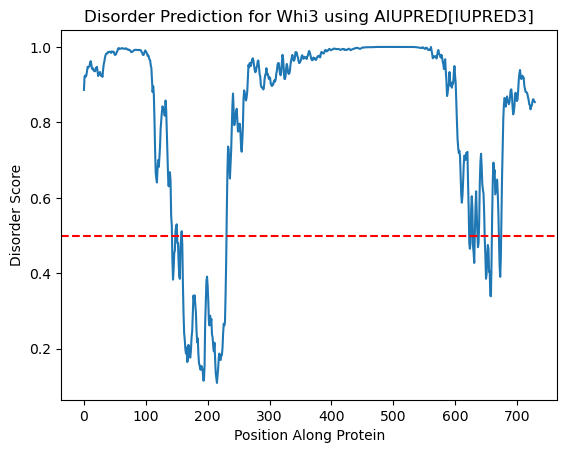

In [103]:
# Predict disorder of a sequence
prediction = aiupred_lib.predict_disorder(sequence, embedding_model, regression_model, device)

ax = pd.DataFrame(prediction).plot(xlabel='Position Along Protein',ylabel='Disorder Score',title='Disorder Prediction for Whi3 using AIUPRED[IUPRED3]',legend=False)
ax.axhline(y=0.5, color='r', linestyle='--')


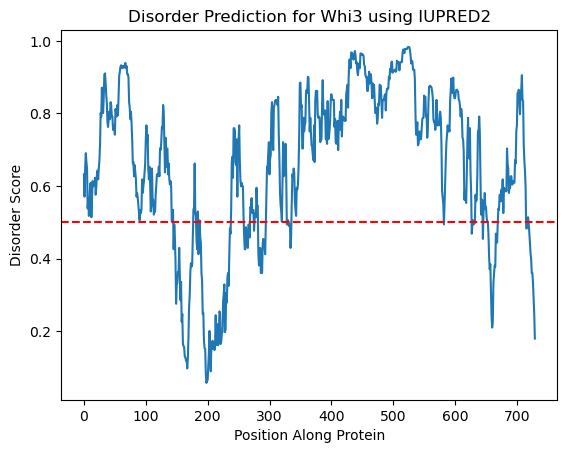

In [104]:
import sys 
sys.path.append('/Users/jasonmohabir/Documents/Duke/Rotation2_Gladfelter/iupred2a')
import iupred2a_lib 

prediction, _ = iupred2a_lib.iupred(sequence, mode='long', new_smoothing=False)
ax = pd.DataFrame(prediction).plot(xlabel='Position Along Protein',ylabel='Disorder Score',title='Disorder Prediction for Whi3 using IUPRED2',legend=False)
ax.axhline(y=0.5, color='r', linestyle='--')



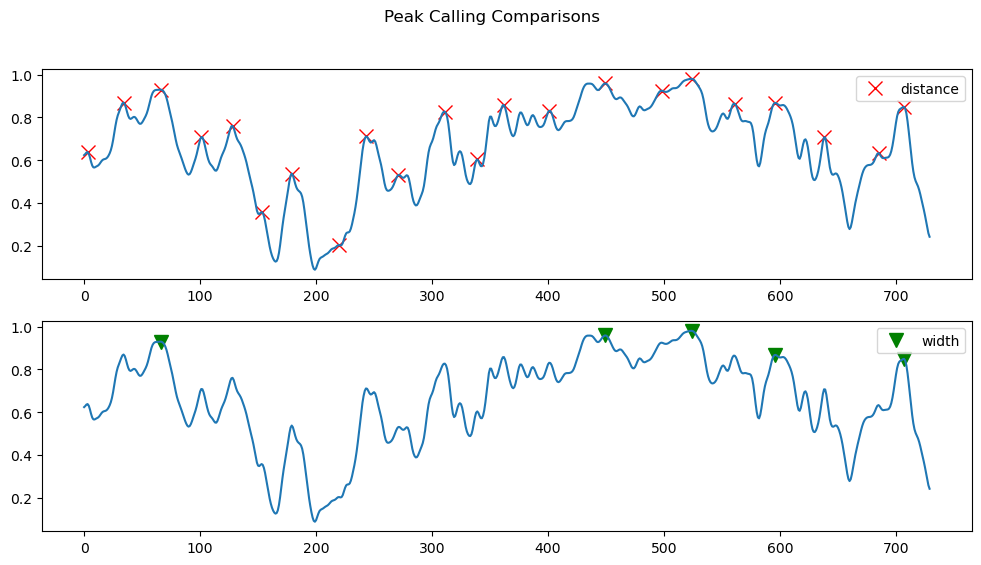

In [120]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d


# Assuming 'prediction' is defined elsewhere in your code
x = np.array(prediction)

# Smooth the data
x_smooth = gaussian_filter1d(x, sigma=2)

peaks, _ = find_peaks(x_smooth, distance=20)
peaks2, _ = find_peaks(x_smooth, width=20)

plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
plt.suptitle('Peak Calling Comparisons')

plt.subplot(2, 1, 1)
plt.plot(peaks, x_smooth[peaks], "xr", markersize=10); plt.plot(x_smooth); plt.legend(['distance'])

plt.subplot(2, 1, 2)
plt.plot(peaks2, x_smooth[peaks2], "vg", markersize=10); plt.plot(x_smooth); plt.legend(['width'])

plt.show()

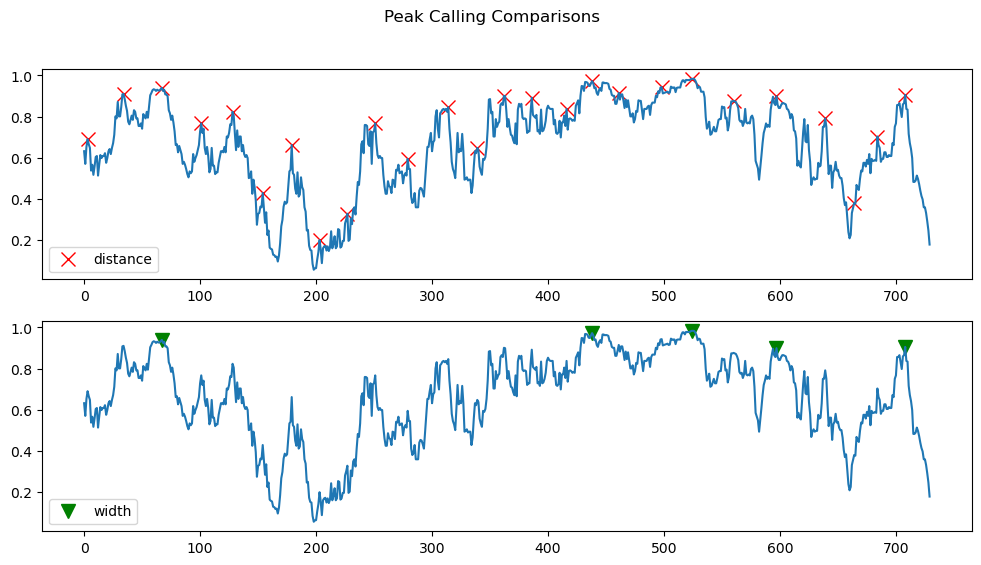

In [121]:
# Peak Calling algorithm 

import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

x = np.array(prediction)
peaks, _ = find_peaks(x, distance=20)
peaks2, _ = find_peaks(x, width=20)

plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
plt.suptitle('Peak Calling Comparisons')

plt.subplot(2, 1, 1)
plt.plot(peaks, x[peaks], "xr",markersize=10); plt.plot(x); plt.legend(['distance'])

plt.subplot(2, 1, 2)
plt.plot(peaks2, x[peaks3], "vg",markersize=10); plt.plot(x); plt.legend(['width'])

plt.show()

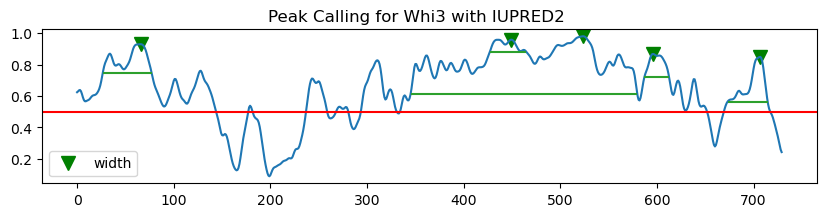

In [161]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks, peak_widths
from scipy.ndimage import gaussian_filter1d

# Assuming 'prediction' is defined elsewhere in your code
x = np.array(prediction)

# Smooth the data
x_smooth = gaussian_filter1d(x, sigma=2)

# Find peaks
peaks, _ = find_peaks(x_smooth, distance=20)
peaks2, _ = find_peaks(x_smooth, width=20)

# Calculate peak widths
widths = peak_widths(x_smooth, peaks2, rel_height=0.5)

plt.figure(figsize=(10, 2))  # Adjust the width and height as needed
plt.suptitle('Peak Calling for Whi3 with IUPRED2')

plt.plot(peaks2, x_smooth[peaks2], "vg", markersize=10); plt.plot(x_smooth); plt.legend(['width'])
plt.hlines(*widths[1:], color="C2")
plt.axhline(0.5, color="red")


plt.show()

In [185]:
# Annotate the sequence corresponding to the widths
result = [] 
for peak, width in zip(peaks2, widths[0]):
    start = int(max(0, peak - width / 2))
    end = int(min(len(sequence), peak + width / 2))
    result.append([end-start, start,end,round(np.mean(prediction[start:end]),2), sequence[start:end]])
disordered_tracts = pd.DataFrame(result)
disordered_tracts.columns = ['length','start','end','mean_disorder','sequence']
disordered_tracts


def get_disordered_tracts(sequence):

    if isinstance(sequence,float): return np.nan

    prediction, _ = iupred2a_lib.iupred(sequence, mode='long', new_smoothing=False)

    x = np.array(prediction)

    # Smooth the data
    x_smooth = gaussian_filter1d(x, sigma=2)

    # Find peaks
    peaks, _ = find_peaks(x_smooth, distance=20)
    peaks2, _ = find_peaks(x_smooth, width=20)

    # Calculate peak widths
    widths = peak_widths(x_smooth, peaks2, rel_height=0.5)

    result = [] 
    for peak, width in zip(peaks2, widths[0]):
        start = int(max(0, peak - width / 2))
        end = int(min(len(sequence), peak + width / 2))
        result.append([end-start, start,end,round(np.mean(prediction[start:end]),2), sequence[start:end]])
    disordered_tracts = pd.DataFrame(result)
    disordered_tracts.columns = ['length','start','end','mean_disorder','sequence']
    
    return disordered_tracts.to_dict(orient='list')['sequence']


In [186]:
get_disordered_tracts(sequence)

['LHHSTVVAMGAESQGGGASNNNNNPANPGSTANNNSNNVNMNSIGGGASLG',
 'QSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQLQ',
 'PQPQRQSLSYNLVTPLSSDMNLPPQSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQLQQQQHHLQQQQHQQQQQSLSQQPQQQQSQQSQAHSQQHQQQHQQQQQQQQPQQQQPQQHPPQQPQQQNSQQAIVGQSQQQVTSGQQKGSSRNSISKTLQVNGPKNAAAALQNTNGISQVDLSLLAKVPPPANPADQNPPCNTLYVGNLPPDATEQELRQLFSSQKGFRRLSFRNK',
 'QVDLSLLAKVPPPANPADQNPPCNT',
 'IRLSFSKNPLGVRGPNSRRGGATNNTSNAGTTNYSYAAAFG']

In [190]:
for ix,i in all_ashbya_sequences['ABL158C'].apply(get_disordered_tracts).items():
    print(ix,i)

Reference_genome ['LHHSTVVAMGAESQGGGASNNNNNPANPGSTANNNSNNVNMNSIGGGASLG', 'QSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQLQ', 'PQPQRQSLSYNLVTPLSSDMNLPPQSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQLQQQQHHLQQQQHQQQQQSLSQQPQQQQSQQSQAHSQQHQQQHQQQQQQQQPQQQQPQQHPPQQPQQQNSQQAIVGQSQQQVTSGQQKGSSRNSISKTLQVNGPKNAAAALQNTNGISQVDLSLLAKVPPPANPADQNPPCNTLYVGNLPPDATEQELRQLFSSQKGFRRLSFRNK', 'QVDLSLLAKVPPPANPADQNPPCNT', 'IRLSFSKNPLGVRGPNSRRGGATNNTSNAGTTNYSYAAAFG']
C5ASGY ['LHHSTVVAMGAESQGGGASNNNNNPANPGSTANNNSNNVNMNSIGGGASLG', 'QSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQLQ', 'PQPQRQSLSYNLVTPLSSDMNLPPQSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQLQQQQHHLQQQQHQQQQQSLSQQPQQQQSQQSQAHSQQHQQQHQQQQQQQQPQQQQPQQHPPQQPQQQNSQQAIVGQSQQQVTSGQQKGSSRNSISKTLQVNGPKNAAAALQNTNGISQVDLSLLAKVPPPANPADQNPPCNTLYVGNLPPDATEQELRQLFSSQKGFRRLSFRNK', 'QVDLSLLAKVPPPANPADQNPPCNT', 'IRLSFSKNPLGVRGPNSRRGGATNNTSNAGTTNYSYAAAFG']
F5ASGY ['SNSSPLHHSTVVAMGAEPQGGGASNNNNNSANPGSTANNNSNNVNMNSIGG', 'SFLLMESDEINDSIWGNGTGIPSSISGLTTSQPPTPHLEWGTTGRRQSSTFYPSQSNTEIPPMHLTGQVQSSQLATGLQQPLPQPQRQSLSY

In [191]:
for ix,i in all_ashbya_sequences['ABL158C'].items():
    print(ix,i)

Reference_genome MSLVNSHSSASVENAAYNLHRAFSSSTENVGHMTPSNSSPLHHSTVVAMGAESQGGGASNNNNNPANPGSTANNNSNNVNMNSIGGGASLGAGSGATGSISGTKGMNNSHSPLHIATMLNTLSMNSNPPSQQQSNVQGPYLVRLQNVPKDTTLRECHALFALAHGVLSIELSSFQQYAERSQTSGQESTNYIVAKFDSLHLACQYATILDEKAQIFGPSFPFKTYVEVVDELTQQQIPFQTQMQMHQGSPPAPTHVTAYQQPLLSASGVVSPPQSASSVKRPSLLVQRSRFSFTDPFSSEQTNMGSQQPDLITTPLKGHQDTGKSFLLMESDEINDSIWGNGTGIPSSISGLTTSQPPTPHLEWGTTGRRQSSTFYPSQSNTEIPPMHLTGQVQSSQLATGLQQPLPQPQRQSLSYNLVTPLSSDMNLPPQSSQGGILPHQAPAQTQPQSQALQHHQHLHHQQQQLQQQQHHLQQQQHQQQQQSLSQQPQQQQSQQSQAHSQQHQQQHQQQQQQQQPQQQQPQQHPPQQPQQQNSQQAIVGQSQQQVTSGQQKGSSRNSISKTLQVNGPKNAAAALQNTNGISQVDLSLLAKVPPPANPADQNPPCNTLYVGNLPPDATEQELRQLFSSQKGFRRLSFRNKNNNGNGHGPMCFVEFEDVAHATRALAELYGSQLARTSGTHNNKGGIRLSFSKNPLGVRGPNSRRGGATNNTSNAGTTNYSYAAAFGKS*
C5ASGY MSLVNSHSSASVENAAYNLHRAFSSSTENVGHMTPSNSSPLHHSTVVAMGAESQGGGASNNNNNPANPGSTANNNSNNVNMNSIGGGASLGAGSGATGSISGTKGMNNSHSPLHIATMLNTLSMNSNPPSQQQSNVQGPYLVRLQNVPKDTTLRECHALFALAHGVLSIELSSFQQYAERSQTSGQESTNYIVAKFDSLHLACQYATILDEKAQIFGPSFPFKTYVEVVDELTQQQIPFQTQMQM

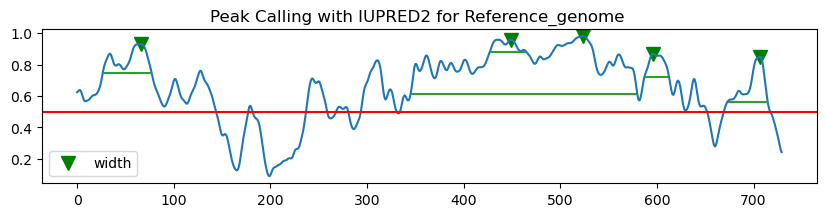

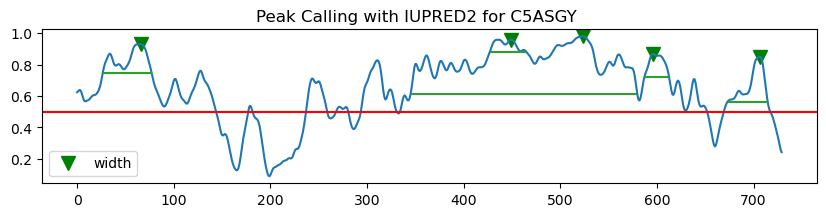

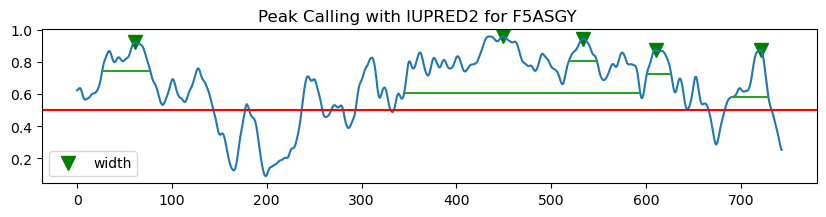

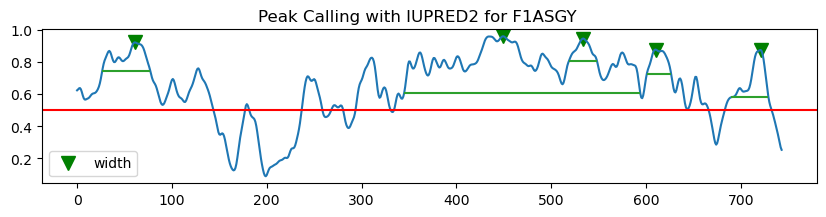

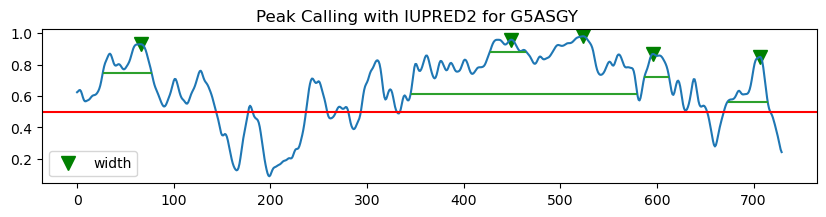

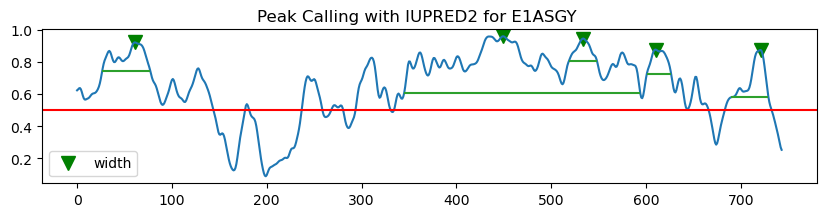

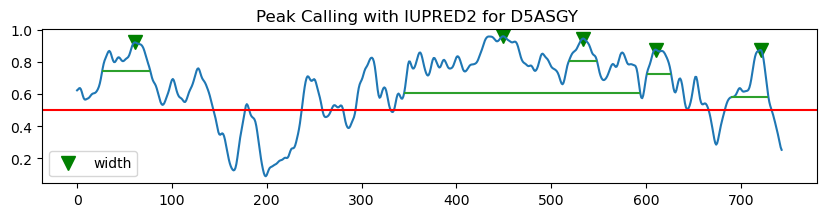

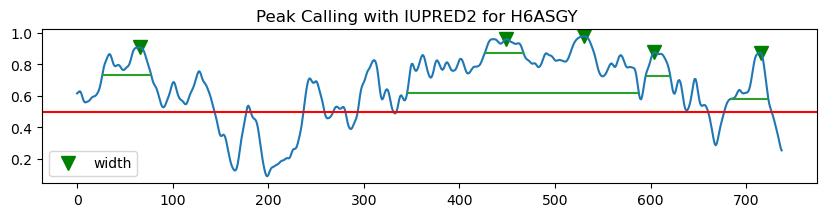

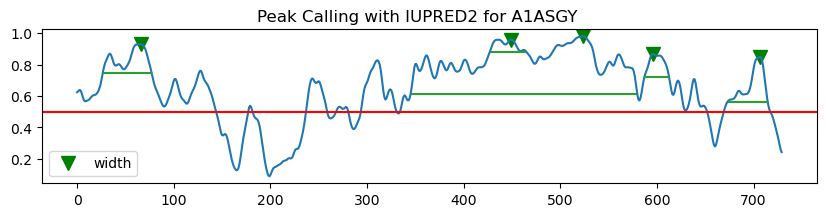

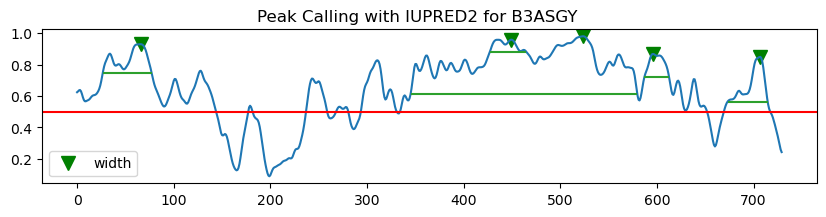

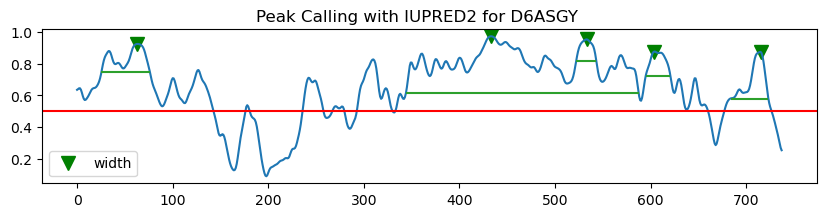

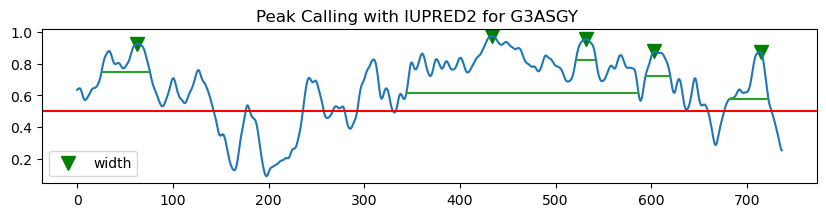

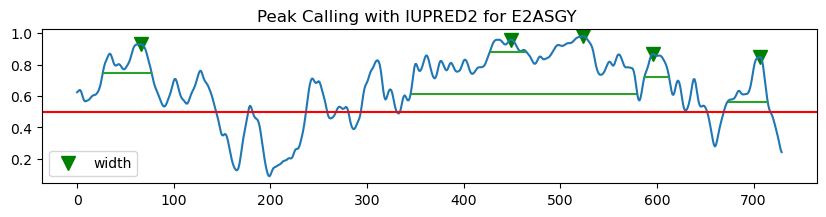

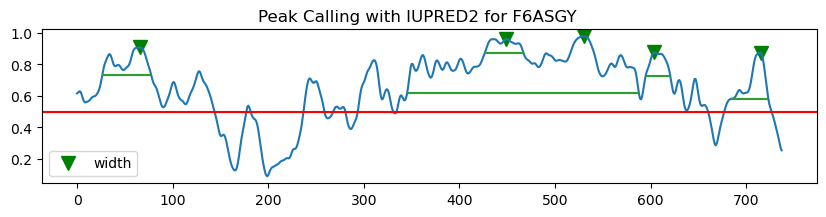

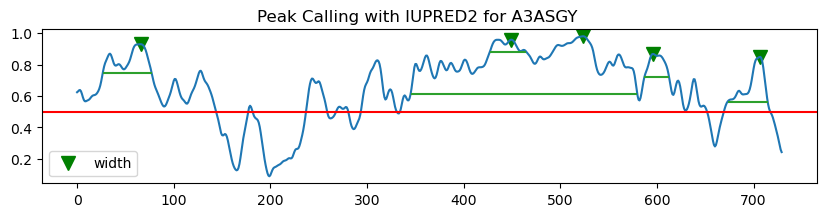

In [202]:
for ix,i in all_ashbya_sequences['ABL158C'].items():
    if not isinstance(i,float):
        get_plot(i,ix)

In [201]:
def get_plot(sequence,title): 
    prediction, _ = iupred2a_lib.iupred(sequence, mode='long', new_smoothing=False)
    x = np.array(prediction)

    # Smooth the data
    x_smooth = gaussian_filter1d(x, sigma=2)

    # Find peaks
    peaks, _ = find_peaks(x_smooth, distance=20)
    peaks2, _ = find_peaks(x_smooth, width=20)

    # Calculate peak widths
    widths = peak_widths(x_smooth, peaks2, rel_height=0.5)

    plt.figure(figsize=(10, 2))  # Adjust the width and height as needed
    plt.suptitle('Peak Calling with IUPRED2 for %s'%(title))

    plt.plot(peaks2, x_smooth[peaks2], "vg", markersize=10); plt.plot(x_smooth); plt.legend(['width'])
    plt.hlines(*widths[1:], color="C2")
    plt.axhline(0.5, color="red")

    plt.show()